## Edge flow denoising


In [7]:

import numpy as np
import matplotlib.pyplot as plt

from pytspl import load_dataset, SCPlot

# load the dataset
sc, coordinates, flow = load_dataset("paper")

# create a plot
scplot = SCPlot(sc, coordinates)

Num. of nodes: 7
Num. of edges: 10
Num. of triangles: 3
Shape: (7, 10, 3)
Max Dimension: 2
Coordinates: 7
Flow: 10


In [8]:
from pytspl.decomposition.eigendecomposition import get_eigendecomposition

L1 = sc.hodge_laplacian_matrix(rank=1).toarray()

u1, eigenvals = get_eigendecomposition(L1)

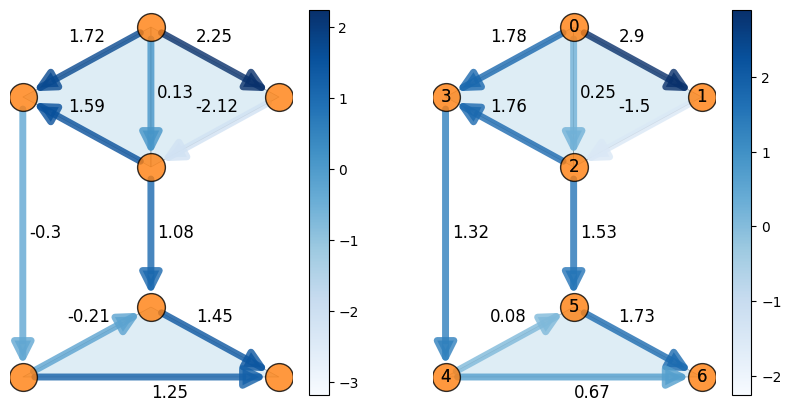

In [9]:

#f0 = np.array([-0.0689, -0.1378, 0.2067, -0.0689, 0.3445, -0.5512, 0.5512, 0.3675, 0.1837, -0.1837])
#f = np.array([0.4688, 1.6961, -2.0522, 0.7933, 0.6633, -1.8589, 0.1176, 0.7101, 3.7621, 2.5857])

f0 = np.asarray(list(flow.values()))
f = [2.90, 0.25, 1.78, -1.50, 1.76, 1.53, 1.32,  0.08, 0.67, 1.73]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
scplot.draw_network(edge_flow=np.round(f0, 2), ax=ax[0])
scplot.draw_network(edge_flow=np.round(f, 2), ax=ax[1])

mu: 0.5, error: 0.7023925539678443


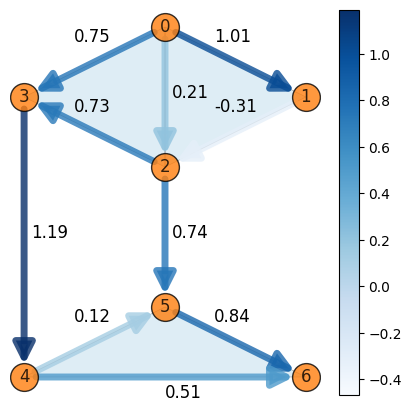

In [11]:
from pytspl.filters import EdgeFlowDenoising


#mu_vals = [1e-2, 5e-2, 1e-1, 2.5e-1, 5e-1, 1, 2.5, 5, 10, 25, 50, 100]
mu_vals = [0.5]

efd = EdgeFlowDenoising(sc)
efd.denoise(f=f, f_true=f0, mu_vals=mu_vals, p_choice="L1")

f_est_L1 = efd.history["f_estimated"]


fig, ax = plt.subplots(1, 1, figsize=(5, 5))
scplot.draw_network(edge_flow=np.round(f_est_L1, 2), ax = ax)

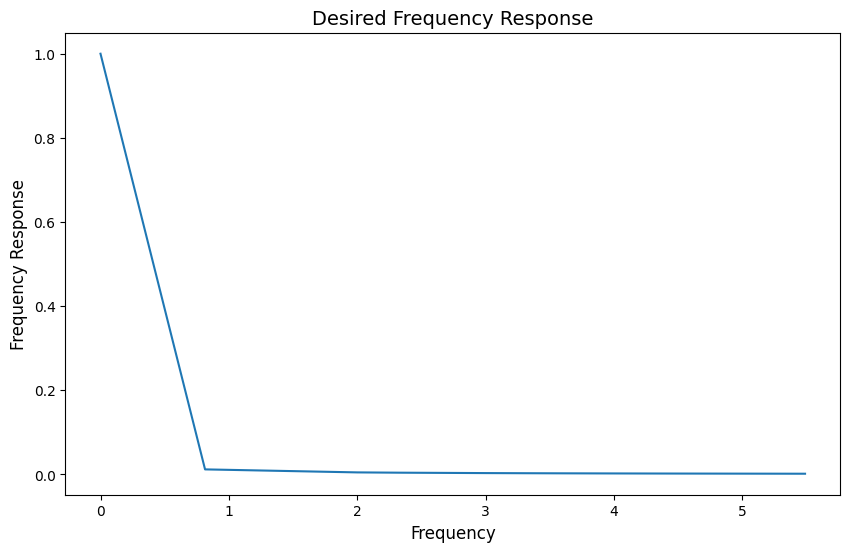

In [7]:
efd.plot_desired_frequency_response(p_choice="L1")

mu: 0.5, error: 0.7309451950015002


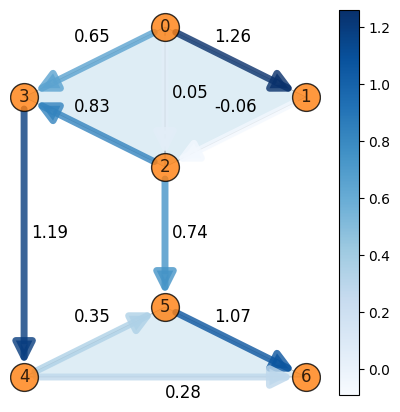

In [12]:
efd.denoise(f=f, f_true=f0, mu_vals=mu_vals, p_choice="L1L")

f_est_L1 = efd.history["f_estimated"]

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
scplot.draw_network(edge_flow=np.round(f_est_L1, 2), ax = ax)